In [ ]:
# !pip install datasets
# !pip install accelerate
# !pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

In [ ]:
from datasets import load_dataset
from datasets.features import ClassLabel


ds_videos = load_dataset("imagefolder", data_dir="/content/drive/MyDrive/ml2/ML_project_2_course/datasets/dataset_shoplifting/frames")




Resolving data files:   0%|          | 0/11981 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
ds = ds_videos["train"].train_test_split(test_size=0.1)

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 10782
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 1198
    })
})

In [ ]:
np.sum(ds['test']['labels'])

409

In [ ]:
from datasets import load_dataset
from datasets.features import ClassLabel

# ds_train1 = load_dataset("imagefolder", data_dir="/content/drive/MyDrive/ml2/ML_project_2_course/datasets/Augmentation/horizontal/horizontal_train")

# ds_train2 = load_dataset("imagefolder", data_dir="/content/drive/MyDrive/ml2/ML_project_2_course/datasets/first_dataset/train")

In [ ]:
# ds_test1 = load_dataset("imagefolder", data_dir="/content/drive/MyDrive/ml2/ML_project_2_course/datasets/Augmentation/horizontal/horizontal_test")

In [ ]:
# ds_test2 = load_dataset("imagefolder", data_dir="/content/drive/MyDrive/ml2/ML_project_2_course/datasets/first_dataset/test")

In [ ]:
# ds_valid2 = load_dataset("imagefolder", data_dir="/content/drive/MyDrive/ml2/ML_project_2_course/datasets/first_dataset/valid")

In [ ]:
# from datasets import DatasetDict
# ds = DatasetDict({
#     'train': ds_train['train'],
#     'test': ds_test['train'],
#})

In [ ]:
# ds

In [ ]:
# ds = ds.class_encode_column("labels")

In [ ]:
# ex = ds['train'][400]
# ex

In [ ]:
# ds['train'].num_rows

In [ ]:
# image = ex['image']
# image

In [ ]:
# labels = ds['train'].features['labels']
# labels

In [ ]:
# labels.int2str(ex['labels'])

In [ ]:
# def get_augmented_dict(ds):
#   augmented_pictures = []
#   for i in range(ds.num_rows):

In [ ]:
import torch
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator
from PIL import Image

def crop_image(image, box):
    additional_area = 1/10
    x_min, y_min, x_max, y_max = box
    width, height = image.size
    box_width = x_max - x_min
    box_height = y_max - y_min
    x_min_2 = max(0, x_min - box_width*additional_area)
    y_min_2 = max(0, y_min - box_height*additional_area)
    x_max_2 = min(width, x_max + box_width*additional_area)
    y_max_2 = min(height, y_max + box_height*additional_area)
    area = (x_min_2, y_min_2, x_max_2, y_max_2)
    cropped_img = image.crop(area)
    return cropped_img

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.set_device(0)
model_detect = YOLO('yolov8n.pt')
model_detect.classes = [0]

def recieve_box(image):
    results = model_detect(source = image, classes=0, show = False, imgsz=640, conf=0.2, iou=0.4, save = False, verbose=False)
    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
    cropped_images = []
    for box in boxes:
        cropped_images.append(crop_image(image, box))
    return cropped_images

100%|██████████| 6.23M/6.23M [00:00<00:00, 84.2MB/s]


In [ ]:
device

'cuda'

In [ ]:
# ex_cropped_images = recieve_box(ex['image'])

# ex_cropped_images

In [ ]:
# ex_cropped_images[0]

In [ ]:
from tqdm.auto import tqdm

In [ ]:
# ds_split_name = 'train'
# dict_train_detected = {'image' : [], 'labels': []}
# for i in tqdm(range(ds[ds_split_name].num_rows)):
#   img = recieve_box(ds[ds_split_name][i]['image'])
#   label = ds[ds_split_name][i]['labels']
#   if(len(img) > 0):
#     dict_train_detected['image'].append(img[0])
#     dict_train_detected['labels'].append(label)
#   # for box_img in img:
#   #   ds_train_detected[i] = {'image': box_img,'labels': label}


In [ ]:
# ds_cur = ds_train1
# dict_train1 = {'image' : [], 'labels': []}
# for i in tqdm(range(ds_cur['train'].num_rows)):
#   img = recieve_box(ds_cur['train'][i]['image'])
#   label = ds_cur['train'][i]['labels']
#   if(len(img) > 0):
#     dict_train1['image'].append(img[0])
#     dict_train1['labels'].append(label)

In [ ]:
# ds_cur = ds_train2
# dict_train2 = {'image' : [], 'labels': []}
# for i in tqdm(range(ds_cur['train'].num_rows)):
#   img = recieve_box(ds_cur['train'][i]['image'])
#   label = ds_cur['train'][i]['labels']
#   if(len(img) > 0):
#     dict_train2['image'].append(img[0])
#     dict_train2['labels'].append(label)

In [ ]:
# ds_cur = ds_valid2
# dict_valid2 = {'image' : [], 'labels': []}
# for i in tqdm(range(ds_cur['train'].num_rows)):
#   img = recieve_box(ds_cur['train'][i]['image'])
#   label = ds_cur['train'][i]['labels']
#   if(len(img) > 0):
#     dict_valid2['image'].append(img[0])
#     dict_valid2['labels'].append(label)

In [ ]:
# ds_cur = ds_test1
# dict_test1 = {'image' : [], 'labels': []}
# for i in tqdm(range(ds_cur['train'].num_rows)):
#   img = recieve_box(ds_cur['train'][i]['image'])
#   label = ds_cur['train'][i]['labels']
#   if(len(img) > 0):
#     dict_test1['image'].append(img[0])
#     dict_test1['labels'].append(label)

In [ ]:
# ds_cur = ds_test2
# dict_test2 = {'image' : [], 'labels': []}
# for i in tqdm(range(ds_cur['train'].num_rows)):
#   img = recieve_box(ds_cur['train'][i]['image'])
#   label = ds_cur['train'][i]['labels']
#   if(len(img) > 0):
#     dict_test2['image'].append(img[0])
#     dict_test2['labels'].append(label)

In [ ]:
ds_split_name = 'train'
dict_train_detected = {'image' : [], 'labels': []}
for i in tqdm(range(ds[ds_split_name].num_rows)):
  img = recieve_box(ds[ds_split_name][i]['image'])
  label = ds[ds_split_name][i]['labels']
  if(len(img) > 0):
    dict_train_detected['image'].append(img[0])
    dict_train_detected['labels'].append(label)

  0%|          | 0/10782 [00:00<?, ?it/s]

In [ ]:
ds_split_name = 'test'
dict_test_detected = {'image' : [], 'labels': []}
for i in tqdm(range(ds[ds_split_name].num_rows)):
  img = recieve_box(ds[ds_split_name][i]['image'])
  label = ds[ds_split_name][i]['labels']
  if(len(img) > 0):
    dict_test_detected['image'].append(img[0])
    dict_test_detected['labels'].append(label)

  0%|          | 0/1198 [00:00<?, ?it/s]

In [ ]:
# dict_train_detected = {'image': dict_train1['image'] + dict_train2['image'] + dict_valid2['image'],
#                       'labels': dict_train1['labels'] + dict_train2['labels'] + dict_valid2['labels']
#                       }

In [ ]:
# dict_train_detected = {'image': dict_train1['image'] + dict_train2['image'] + dict_valid2['image'],
#                       'labels': dict_train1['labels'] + dict_train2['labels'] + dict_valid2['labels']
#                       }

In [ ]:
# dict_test_detected = {'image': dict_test1['image'] + dict_test2['image'],
#                       'labels': dict_test1['labels'] + dict_test2['labels']
#                       }

In [ ]:
from datasets import Dataset

ds_train_detected_new = Dataset.from_dict(dict_train_detected)

ds_train_detected_new

Dataset({
    features: ['image', 'labels'],
    num_rows: 9739
})

In [ ]:
# ds_split_name = 'test'
# dict_test_detected = {'image' : [], 'labels': []}
# for i in tqdm(range(ds[ds_split_name].num_rows)):
#   img = recieve_box(ds[ds_split_name][i]['image'])
#   label = ds[ds_split_name][i]['labels']
#   if(len(img) > 0):
#     dict_test_detected['image'].append(img[0])
#     dict_test_detected['labels'].append(label)

In [ ]:
from datasets import Dataset

ds_test_detected_new = Dataset.from_dict(dict_test_detected)

ds_test_detected_new

Dataset({
    features: ['image', 'labels'],
    num_rows: 1064
})

In [ ]:
from datasets import DatasetDict
ds_detected = DatasetDict({
    'train': ds_train_detected_new,
    'test': ds_test_detected_new,
    })

ds_detected = ds_detected.class_encode_column("labels")

Stringifying the column:   0%|          | 0/9739 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/9739 [00:00<?, ? examples/s]

Stringifying the column:   0%|          | 0/1064 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/1064 [00:00<?, ? examples/s]

In [ ]:
ds_detected

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 9739
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 1064
    })
})

In [ ]:
from transformers import ViTImageProcessor

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [ ]:
process_example(ds_detected['train'][0])

{'pixel_values': tensor([[[[-0.4745, -0.4667, -0.4667,  ...,  0.0745,  0.1059,  0.1216],
          [-0.4745, -0.4745, -0.4824,  ...,  0.0745,  0.1059,  0.1294],
          [-0.4745, -0.4824, -0.4980,  ...,  0.0745,  0.1059,  0.1294],
          ...,
          [-0.3961, -0.3569, -0.5059,  ...,  0.0118,  0.0118,  0.0196],
          [-0.4039, -0.3490, -0.4039,  ...,  0.0118,  0.0118,  0.0196],
          [-0.3961, -0.3882, -0.3647,  ...,  0.0039,  0.0118,  0.0196]],

         [[-0.4196, -0.4118, -0.4118,  ...,  0.0510,  0.0745,  0.0902],
          [-0.4196, -0.4196, -0.4275,  ...,  0.0510,  0.0745,  0.0980],
          [-0.4196, -0.4275, -0.4431,  ...,  0.0510,  0.0745,  0.0980],
          ...,
          [-0.2392, -0.2157, -0.3804,  ...,  0.0275,  0.0275,  0.0353],
          [-0.2392, -0.2000, -0.2549,  ...,  0.0275,  0.0275,  0.0353],
          [-0.2157, -0.2314, -0.2157,  ...,  0.0196,  0.0275,  0.0353]],

         [[-0.2784, -0.2706, -0.2706,  ...,  0.0588,  0.0824,  0.0980],
          [-0

In [ ]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs

In [ ]:
prepared_ds = ds_detected.with_transform(transform)

In [ ]:
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [ ]:
import numpy as np

from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

<ipython-input-48-37548c35eacb>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
from transformers import ViTForImageClassification

labels = ds_detected['train'].features['labels'].names

model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="/content/drive/MyDrive/ml2/ML_project_2_course/weights2",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  save_total_limit=5,
  logging_steps=10,
  learning_rate=2e-4,
  weight_decay=0.01,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [ ]:
training_args.device

device(type='cuda', index=0)

In [ ]:
from datasets import load_metric

metric = load_metric('f1')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["test"],
    tokenizer=processor,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Step,Training Loss,Validation Loss,F1
100,0.508700,0.507826,0.658574
200,0.487300,0.390067,0.736983
300,0.418300,0.374588,0.736048
400,0.269200,0.291608,0.838628
500,0.254800,0.306036,0.841463
600,0.194500,0.195462,0.892388
700,0.164400,0.208302,0.886427
800,0.260800,0.194348,0.886866
900,0.211100,0.195379,0.891334
1000,0.119000,0.156312,0.917900


***** train metrics *****
  epoch                    =          4.0
  total_flos               = 2811456050GF
  train_loss               =       0.1652
  train_runtime            =   0:20:13.54
  train_samples_per_second =       32.101
  train_steps_per_second   =        2.007


In [ ]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        4.0
  eval_f1                 =     0.9679
  eval_loss               =     0.0781
  eval_runtime            = 0:00:13.33
  eval_samples_per_second =     79.786
  eval_steps_per_second   =      9.973


In [ ]:
prepared_ds['test']

Dataset({
    features: ['image', 'labels'],
    num_rows: 1064
})

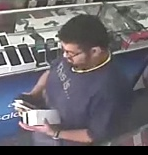

In [ ]:
ex = ds_detected['test'][400]
ex['image']

In [ ]:
inputs = processor(ex['image'], return_tensors='pt')

In [ ]:
# logits = model(**inputs).logits

# logits

In [ ]:
logits = model(inputs['pixel_values'].to(device)).logits

logits

tensor([[ 3.1289, -2.9727]], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [ ]:
 logits.argmax(-1).item()

0

In [ ]:
# array = np.array(ds_train["train"]['labels'])
# array.sum()/array.shape[0]

In [ ]:
softmax = torch.nn.Softmax()

def image_to_prob(img):
    inputs = processor(img, return_tensors='pt')
    logits = model(inputs['pixel_values'].to(device)).logits
    return float(softmax(logits)[0][1])

In [ ]:
logits.cpu().data.numpy()

array([[     3.1289,     -2.9727]], dtype=float32)

In [ ]:
def get_logits(img):
    inputs = processor(img, return_tensors='pt')
    return model(inputs['pixel_values'].to(device)).logits.cpu().data.numpy()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
logits_test = []
for i in tqdm(range(0, ds_detected['test'].num_rows)):
  logits_test.append(get_logits(ds_detected['test'][i]['image']))
  #logits_test.append(image_to_prob(ds_detected['test'][i]['image']))

  0%|          | 0/1064 [00:00<?, ?it/s]

In [ ]:
preds = np.array(logits_test).argmax(-1).flatten()

In [ ]:
probs = []
for i in tqdm(range(0, ds_detected['test'].num_rows)):
  probs.append(image_to_prob(ds_detected['test'][i]['image']))

  0%|          | 0/1064 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ds_detected['test']['labels'], probs)

0.996847553809995

In [ ]:

roc_auc_score(ds_detected['test']['labels'], preds)

0.9741155368629392

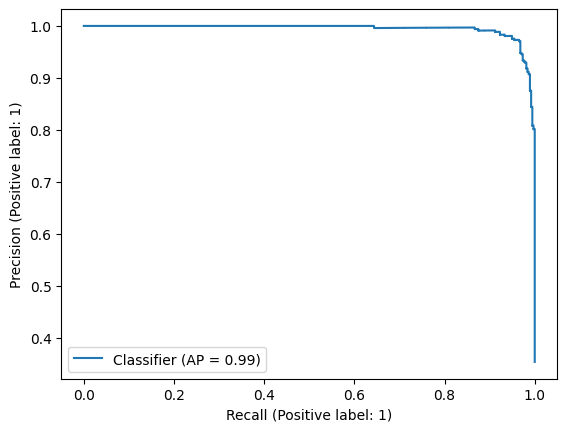

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(ds_detected['test']['labels'], probs)
plt.show()

In [ ]:
def image_to_prob(img):
    inputs = processor(img, return_tensors='pt')
    logits = model(inputs['pixel_values'].to(device)).logits
    return float(softmax(logits)[0][1])

In [ ]:
def crop_image(image, box):
    additional_area = 1/10
    x_min, y_min, x_max, y_max = box
    width, height = image.size
    box_width = x_max - x_min
    box_height = y_max - y_min
    x_min_2 = max(0, x_min - box_width*additional_area)
    y_min_2 = max(0, y_min - box_height*additional_area)
    x_max_2 = min(width, x_max + box_width*additional_area)
    y_max_2 = min(height, y_max + box_height*additional_area)
    area = (x_min_2, y_min_2, x_max_2, y_max_2)
    cropped_img = image.crop(area)
    return cropped_img

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def recieve_box(image):
    results = model_detect(source = image, classes=0, show = False, imgsz=640, conf=0.2, iou=0.4, save = False, verbose=False)
    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
    cropped_images = []
    for box in boxes:
        cropped_images.append(crop_image(image, box))
    return cropped_images

In [ ]:
from google.colab.patches import cv2_imshow

import cv2
from ultralytics import YOLO
import random
from PIL import Image

def draw_bounding_boxes_without_id(frame, results):
    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
    classes = results[0].boxes.cls.cpu().numpy().astype(int)

    for box, clss in zip(boxes, classes):
        # Generate a random color for each object based on its ID
        if clss != 0:
            random.seed(int(clss)+8)
            color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

            cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3],), color, 2)
            cv2.putText(
                frame,
                f"{model.model.names[clss]}",
                (box[0], box[1]),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (50, 255, 50),
                2,
            )
    return frame


def process_video_with_tracking(model, input_video_path, show_video=True, save_video=False, output_video_path="output_video.mp4"):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        raise Exception("Error: Could not open video file.")

    # Get input video frame rate and dimensions
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the output video writer
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        results = model.track(frame, iou=0.4, conf=0.25, persist=True, imgsz=608, verbose=False, tracker="bytetrack.yaml", classes=0)

        if results[0].boxes.id != None: # this will ensure that id is not None -> exist tracks
            boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
            ids = results[0].boxes.id.cpu().numpy().astype(int)

            for box, id in zip(boxes, ids):
                # Generate a random color for each object based on its ID
                random.seed(int(id))
                color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
                additional_area = 1/10
                x_min, y_min, x_max, y_max = box
                width, height = frame_width, frame_height
                box_width = x_max - x_min
                box_height = y_max - y_min
                x_min_2 = max(0, x_min - box_width*additional_area)
                y_min_2 = max(0, y_min - box_height*additional_area)
                x_max_2 = min(width, x_max + box_width*additional_area)
                y_max_2 = min(height, y_max + box_height*additional_area)
                area = (x_min_2, y_min_2, x_max_2, y_max_2)
                cropped_img = Image.fromarray(frame, 'RGB').crop(area)

                prob = image_to_prob(cropped_img)

                cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3],), color, 2)
                cv2.putText(
                    frame,
                    f"{prob:.2f}",
                    (box[0], box[1]),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.70,
                    (0, 255, 255),
                    2,
                )

        if save_video:
            out.write(frame)

        if show_video:
            frame = cv2.resize(frame, (0, 0), fx=0.75, fy=0.75)
            #cv2.imshow("frame", frame)
            cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    # Release the input video capture and output video writer
    cap.release()
    if save_video:
        out.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()
    return results

# Example usage:
model1 = YOLO('yolov8m.pt')
model1.fuse()
results = process_video_with_tracking(model1, "/content/drive/MyDrive/ml2/ML_project_2_course/datasets/videos/Shoplifting033_x264.mp4", show_video=False, save_video=True, output_video_path="/content/drive/MyDrive/ml2/ML_project_2_course/datasets/videos_tracked/output_video1.mp4")

100%|██████████| 49.7M/49.7M [00:00<00:00, 209MB/s]


YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs
requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.6s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
